In [82]:
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt 
import statsmodels
import gdown
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn

ModuleNotFoundError: No module named 'torch'

In [2]:
df_cry = pd.read_pickle("hourly.pkl")

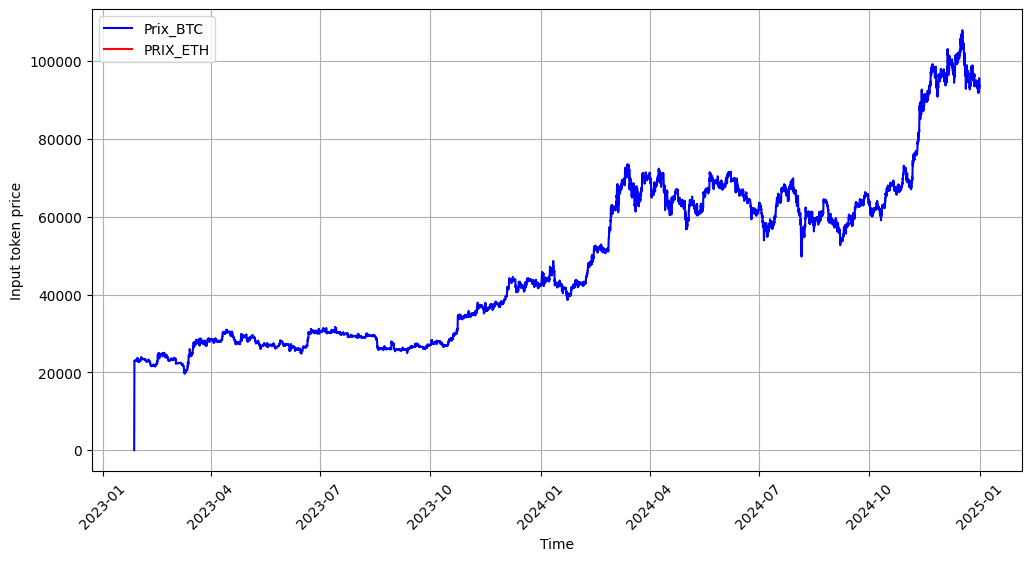

In [3]:
df_BTC=df_cry[df_cry['reserve_name']=='Wrapped BTC']
df_ETH=df_cry[df_cry['reserve_name']== 'Wrapped Ether']
plt.figure(figsize=(12, 6))
plt.plot(df_BTC["datetime"], df_BTC["inputTokenPriceUSD"],color="blue", label="Prix_BTC")
plt.plot(df_ETH["datetime"], df_ETH["inputTokenPriceUSD"], color="red", label="PRIX_ETH")
plt.title=('Evolution of the input token price')
plt.xlabel('Time')
plt.ylabel('Input token price')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [4]:
df_BTC.head()

,Unnamed: 0,blockNumber,timestamp_hours,id,inputTokenPriceUSD,outputTokenPriceUSD,snapshot_timestamp,reserve_name,protocol_name,protocol,datetime
91596,456,16496800,465223,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84719...,0.000000,NaN,1674806207,Wrapped BTC,Aave v3,Aave,2023-01-27 07:00:00+00:00
91575,435,16498211,465228,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84c19...,22901.415798,NaN,1674823235,Wrapped BTC,Aave v3,Aave,2023-01-27 12:00:00+00:00
91570,430,16498545,465229,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84d19...,22889.291609,NaN,1674827267,Wrapped BTC,Aave v3,Aave,2023-01-27 13:00:00+00:00
91566,426,16498670,465230,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84e19...,22840.819903,NaN,1674828779,Wrapped BTC,Aave v3,Aave,2023-01-27 14:00:00+00:00
91556,416,16499116,465231,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84f19...,22979.545483,NaN,1674834143,Wrapped BTC,Aave v3,Aave,2023-01-27 15:00:00+00:00


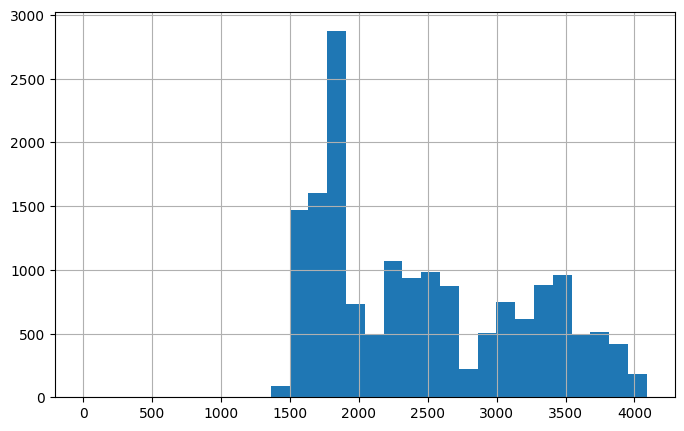

In [23]:
df_ETH['inputTokenPriceUSD'].hist(figsize=(8,5), bins=30)
plt.title=("Distribution des prix ETH")
plt.show()

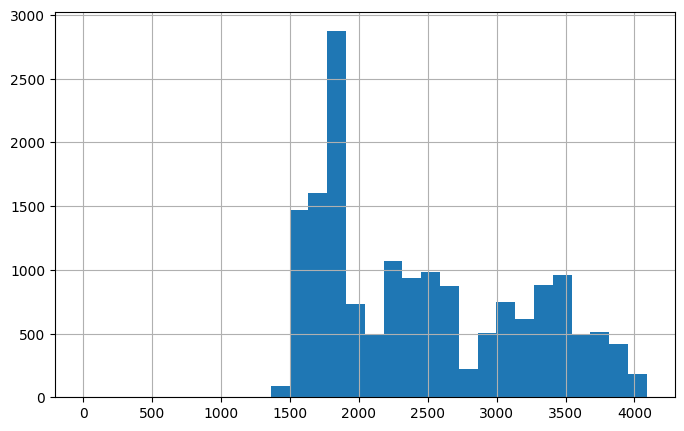

In [24]:
df_ETH['inputTokenPriceUSD'].hist(figsize=(8,5), bins=30)
plt.title=("Distribution des prix BTC")
plt.show()

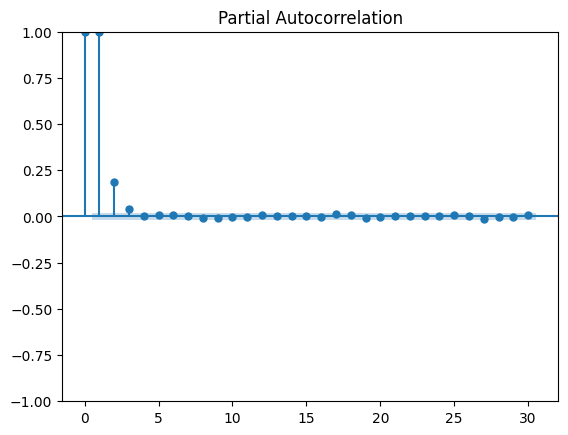

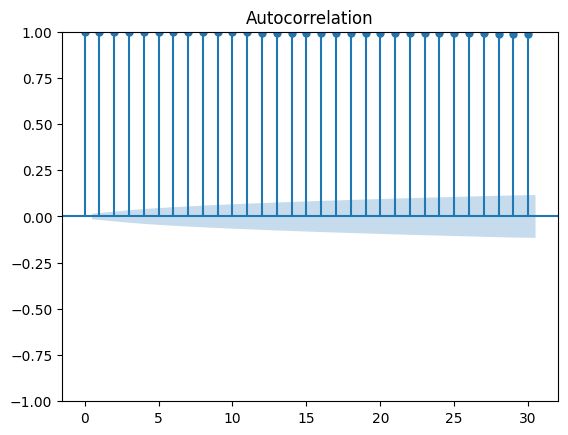

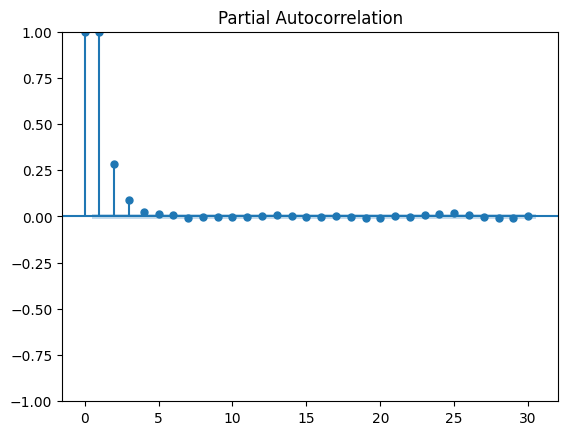

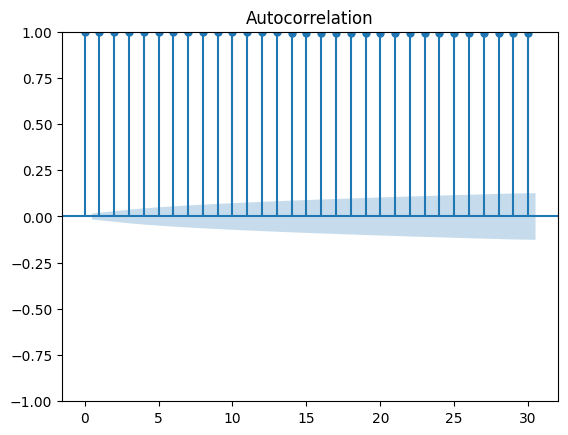

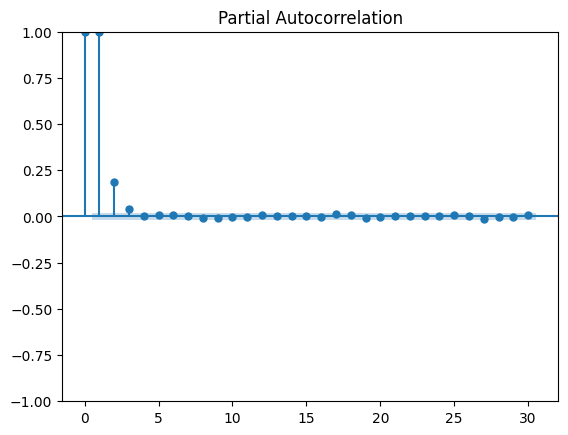

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_ETH['inputTokenPriceUSD'], lags=30)
plot_pacf(df_ETH['inputTokenPriceUSD'], lags=30)

plot_acf(df_BTC['inputTokenPriceUSD'], lags=30)
plot_pacf(df_BTC['inputTokenPriceUSD'], lags=30)

InvalidIndexError: (slice(0, 8414, None), slice(None, None, None))

**Les séries sont non stationnaires**

In [9]:
df= pd.read_pickle("reserve_features.pkl")
df.head()

,Unnamed: 0,regular_datetime,accruedToTreasury,availableLiquidity,averageStableBorrowRate,liquidityIndex,liquidityRate,priceInEth,priceInUsd,stableBorrowRate,...,totalLiquidity,totalPrincipalStableDebt,totalScaledVariableDebt,utilizationRate,variableBorrowIndex,variableBorrowRate,reserve_decimals,reserve_name,reserve_pool,true_value
277128,336,2023-01-27 08:00:00+00:00,1.055897e-07,3.001000,0.0,1.000014,0.000122,1.585870e+11,1.585870e+11,0.068676,...,3.042100,0.0,0.0411,0.013510,1.000017,0.010642,18.0,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
277464,672,2023-01-27 08:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aave Token,NaN,0.0
277016,224,2023-01-27 08:00:00+00:00,0.000000e+00,0.180987,0.0,1.000000,0.000000,0.000000e+00,0.000000e+00,0.075000,...,0.180987,0.0,0.0000,0.000000,1.000000,0.002500,18.0,Wrapped liquid staked Ether 2.0,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
277240,448,2023-01-27 08:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ChainLink Token,NaN,0.0
276792,0,2023-01-27 08:00:00+00:00,0.000000e+00,0.584767,0.0,1.000000,0.000000,1.000158e+08,1.000158e+08,0.050000,...,1.584767,0.0,1.0000,0.631008,1.000000,0.000000,18.0,Dai Stablecoin,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0


In [11]:
res_BTC=df[df['reserve_name']=='Wrapped BTC']
pd.DataFrame(res_BTC)

,Unnamed: 0,regular_datetime,accruedToTreasury,availableLiquidity,averageStableBorrowRate,liquidityIndex,liquidityRate,priceInEth,priceInUsd,stableBorrowRate,...,totalLiquidity,totalPrincipalStableDebt,totalScaledVariableDebt,utilizationRate,variableBorrowIndex,variableBorrowRate,reserve_decimals,reserve_name,reserve_pool,true_value
277352,560,2023-01-27 08:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wrapped BTC,NaN,0.0
277353,561,2023-01-27 09:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wrapped BTC,NaN,0.0
277354,562,2023-01-27 10:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wrapped BTC,NaN,0.0
277355,563,2023-01-27 11:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wrapped BTC,NaN,0.0
277356,564,2023-01-27 12:00:00+00:00,0.000000,0.619864,0.0,1.000000,0.000000,0.0,0.0,0.09,...,0.619864,0.0,0.000000,0.000000,1.000000,0.000000,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254467,3715,2024-12-31 19:00:00+00:00,0.036288,33788.341342,0.0,1.003206,0.000145,0.0,0.0,0.00,...,36511.314003,0.0,2730.518880,0.074579,1.021039,0.003809,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
254468,3716,2024-12-31 20:00:00+00:00,0.036469,33774.009561,0.0,1.003206,0.000146,0.0,0.0,0.00,...,36508.195222,0.0,2741.500825,0.074892,1.021040,0.003825,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
254469,3717,2024-12-31 21:00:00+00:00,0.037136,33746.943636,0.0,1.003206,0.000146,0.0,0.0,0.00,...,36499.301831,0.0,2759.298887,0.075409,1.021040,0.003823,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
254470,3718,2024-12-31 22:00:00+00:00,0.038120,33746.963060,0.0,1.003206,0.000148,0.0,0.0,0.00,...,36499.321755,0.0,2759.299377,0.075408,1.021041,0.003851,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0


In [49]:
df=pd.merge(df_BTC, res_BTC, left_on='datetime', right_on='regular_datetime')
cols = ['datetime'] + [col for col in df.columns if col != 'datetime']
df= df[cols]
pd.DataFrame(df)


,datetime,Unnamed: 0_x,blockNumber,timestamp_hours,id,inputTokenPriceUSD,outputTokenPriceUSD,snapshot_timestamp,reserve_name_x,protocol_name,...,totalLiquidity,totalPrincipalStableDebt,totalScaledVariableDebt,utilizationRate,variableBorrowIndex,variableBorrowRate,reserve_decimals,reserve_name_y,reserve_pool,true_value
0,2023-01-27 12:00:00+00:00,435,16498211,465228,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84c19...,22901.415798,NaN,1674823235,Wrapped BTC,Aave v3,...,0.619864,0.0,0.000000,0.000000,1.000000,0.000000,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
1,2023-01-27 13:00:00+00:00,430,16498545,465229,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84d19...,22889.291609,NaN,1674827267,Wrapped BTC,Aave v3,...,0.768670,0.0,0.000000,0.000000,1.000000,0.000000,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
2,2023-01-27 14:00:00+00:00,426,16498670,465230,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84e19...,22840.819903,NaN,1674828779,Wrapped BTC,Aave v3,...,3.443268,0.0,0.000000,0.000000,1.000000,0.000000,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
3,2023-01-27 15:00:00+00:00,416,16499116,465231,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84f19...,22979.545483,NaN,1674834143,Wrapped BTC,Aave v3,...,5.263297,0.0,0.000000,0.000000,1.000000,0.000000,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
4,2023-01-27 16:00:00+00:00,410,16499351,465232,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de85019...,23008.788367,NaN,1674836999,Wrapped BTC,Aave v3,...,5.318675,0.0,0.000000,0.000000,1.000000,0.000000,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14018,2024-12-31 19:00:00+00:00,57,21524678,482131,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de8535b...,93759.525729,NaN,1735674995,Wrapped BTC,Aave v3,...,36511.314003,0.0,2730.518880,0.074579,1.021039,0.003809,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
14019,2024-12-31 20:00:00+00:00,50,21524833,482132,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de8545b...,93759.525729,NaN,1735676855,Wrapped BTC,Aave v3,...,36508.195222,0.0,2741.500825,0.074892,1.021040,0.003825,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
14020,2024-12-31 21:00:00+00:00,37,21525145,482133,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de8555b...,93271.901873,NaN,1735680623,Wrapped BTC,Aave v3,...,36499.301831,0.0,2759.298887,0.075409,1.021040,0.003823,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
14021,2024-12-31 22:00:00+00:00,19,21525574,482134,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de8565b...,93512.722731,NaN,1735685771,Wrapped BTC,Aave v3,...,36499.321755,0.0,2759.299377,0.075408,1.021041,0.003851,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0


In [ ]:
missing_percentage = df.isnull().mean() * 100

# Créer un DataFrame avec toutes les informations pour une meilleure visibilité
missing_info = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': missing_percentage,
    'Filling Percentage': 100 - missing_percentage
})

missing_info_sorted = missing_percentage.sort_values(ascending=False)

print(missing_info_sorted)

outputTokenPriceUSD         100.0
datetime                      0.0
Unnamed: 0_x                  0.0
blockNumber                   0.0
id                            0.0
timestamp_hours               0.0
inputTokenPriceUSD            0.0
snapshot_timestamp            0.0
reserve_name_x                0.0
protocol_name                 0.0
protocol                      0.0
Unnamed: 0_y                  0.0
regular_datetime              0.0
accruedToTreasury             0.0
availableLiquidity            0.0
averageStableBorrowRate       0.0
liquidityIndex                0.0
liquidityRate                 0.0
priceInEth                    0.0
priceInUsd                    0.0
stableBorrowRate              0.0
timestamp                     0.0
totalATokenSupply             0.0
totalCurrentVariableDebt      0.0
totalLiquidity                0.0
totalPrincipalStableDebt      0.0
totalScaledVariableDebt       0.0
utilizationRate               0.0
variableBorrowIndex           0.0
variableBorrow

In [50]:
df=df.drop(['totalPrincipalStableDebt','outputTokenPriceUSD', 'Unnamed: 0_x', 'blockNumber', 'timestamp_hours', 'snapshot_timestamp', 
           'Unnamed: 0_y', 'totalPrincipalStableDebt', 'averageStableBorrowRate', 'priceInEth', 'priceInUsd', 'timestamp','reserve_decimals'
           ,'true_value'] , axis=1)

In [51]:
df_num= df.select_dtypes(include=['number'])
pd.DataFrame(df_num)

,inputTokenPriceUSD,accruedToTreasury,availableLiquidity,liquidityIndex,liquidityRate,stableBorrowRate,totalATokenSupply,totalCurrentVariableDebt,totalLiquidity,totalScaledVariableDebt,utilizationRate,variableBorrowIndex,variableBorrowRate
0,22901.415798,0.000000,0.619864,1.000000,0.000000,0.09,0.619864,0.000000,0.619864,0.000000,0.000000,1.000000,0.000000
1,22889.291609,0.000000,0.768670,1.000000,0.000000,0.09,0.768670,0.000000,0.768670,0.000000,0.000000,1.000000,0.000000
2,22840.819903,0.000000,3.443268,1.000000,0.000000,0.09,3.443268,0.000000,3.443268,0.000000,0.000000,1.000000,0.000000
3,22979.545483,0.000000,5.263297,1.000000,0.000000,0.09,5.263297,0.000000,5.263297,0.000000,0.000000,1.000000,0.000000
4,23008.788367,0.000000,5.318675,1.000000,0.000000,0.09,5.318675,0.000000,5.318675,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14018,93759.525729,0.036288,33788.341342,1.003206,0.000145,0.00,36595.717590,2787.966074,36511.314003,2730.518880,0.074579,1.021039,0.003809
14019,93759.525729,0.036469,33774.009561,1.003206,0.000146,0.00,36592.599123,2799.180682,36508.195222,2741.500825,0.074892,1.021040,0.003825
14020,93271.901873,0.037136,33746.943636,1.003206,0.000146,0.00,36583.706269,2817.354629,36499.301831,2759.298887,0.075409,1.021040,0.003823
14021,93512.722731,0.038120,33746.963060,1.003206,0.000148,0.00,36583.727180,2817.356429,36499.321755,2759.299377,0.075408,1.021041,0.003851


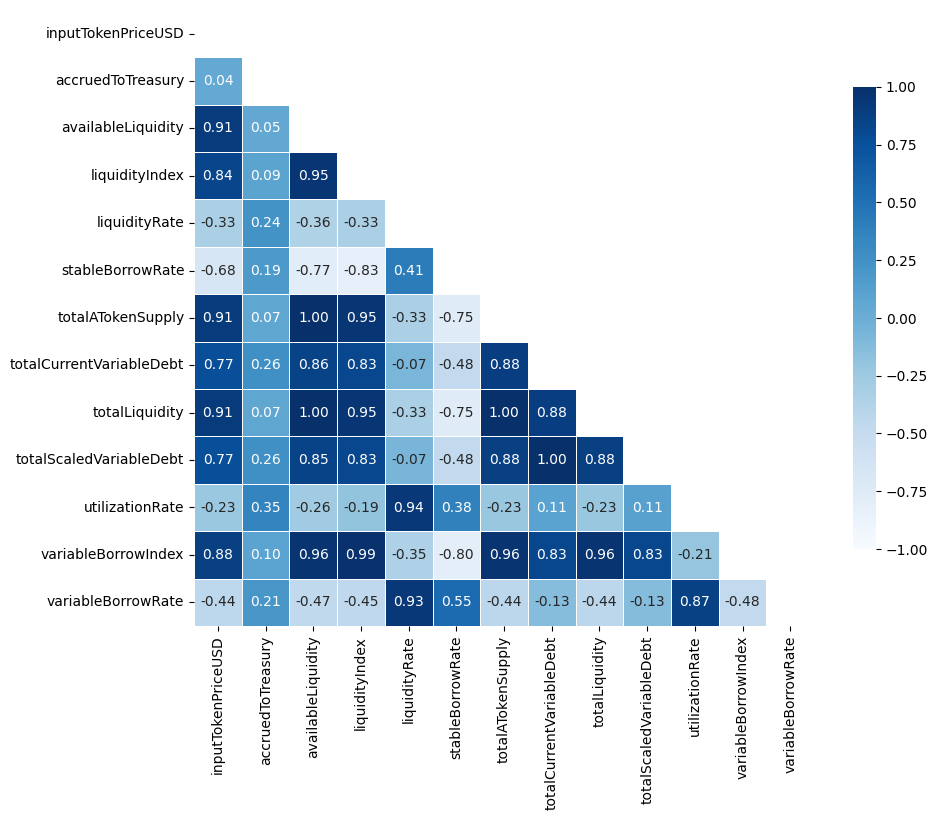

In [56]:
corr_matrix=df_num.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, cbar_kws={'shrink': 0.75})
plt.show()

In [62]:
print(df_num.columns)

Index(['inputTokenPriceUSD', 'accruedToTreasury', 'availableLiquidity',
       'liquidityIndex', 'liquidityRate', 'stableBorrowRate',
       'totalATokenSupply', 'totalCurrentVariableDebt', 'totalLiquidity',
       'totalScaledVariableDebt', 'utilizationRate', 'variableBorrowIndex',
       'variableBorrowRate'],
      dtype='object')


In [72]:
df['datetime'] = pd.to_datetime(df['datetime'])
df_num['datetime']=df['datetime']
df_num.set_index('datetime', inplace=True)

In [74]:
df_num['Hour'] = df_num.index.hour  # L'heure de la journée (0-23)
df_num['DayOfWeek'] = df_num.index.dayofweek  # Le jour de la semaine (0 = Lundi, 6 = Dimanche)
df_num['Month'] = df_num.index.month  # Le mois de l'année (1-12)
df_num['Year'] = df_num.index.year  # L'année (ex. 2023)

# Encodage cyclique pour l'heure et le jour de la semaine
df_num['Hour_sin'] = np.sin(2 * np.pi * df_num['Hour'] / 24)
df_num['Hour_cos'] = np.cos(2 * np.pi * df_num['Hour'] / 24)
df_num['DayOfWeek_sin'] = np.sin(2 * np.pi * df_num['DayOfWeek'] / 7)
df_num['DayOfWeek_cos'] = np.cos(2 * np.pi * df_num['DayOfWeek'] / 7)

df_features = df_num[['inputTokenPriceUSD', 'accruedToTreasury', 'availableLiquidity',
       'liquidityIndex', 'liquidityRate', 'stableBorrowRate',
       'totalATokenSupply', 'totalCurrentVariableDebt', 'totalLiquidity',
       'totalScaledVariableDebt', 'utilizationRate', 'variableBorrowIndex',
       'variableBorrowRate', 'Hour_sin', 'Hour_cos', 'DayOfWeek_sin', 'DayOfWeek_cos']]

In [76]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features)

# Créer un DataFrame avec les données scalées
df_scaled = pd.DataFrame(scaled_data, columns=df_features.columns)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [77]:
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        target = data[i + seq_length, 3]  #BTC price as the target
        sequences.append(seq)
        targets.append(target)
    
    return np.array(sequences), np.array(targets)
# Utiliser 24 heures précédentes pour prédire la prochaine heure
SEQ_LENGTH = 24

# Créer les séquences pour l'entraînement
X, y = create_sequences(df_scaled.values, SEQ_LENGTH)

# Reshaper X en 3D pour LSTM
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

In [78]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [79]:
class LSTMModel(nn.Module):
    def __init__(self, input_size=5, hidden_layer_size=50, output_size=1):
        super(LSTMModel, self).__init__()
        
        # LSTM layer: input size = number of features, hidden size = 50
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        
        # Fully connected layer to output the final prediction (Close price)
        self.fc = nn.Linear(hidden_layer_size, output_size)
    
    def forward(self, x):
        # Pass the input through the LSTM layer
        lstm_out, _ = self.lstm(x)
        
        # Get the output of the last time step
        last_lstm_out = lstm_out[:, -1, :]
        
        # Pass the last time step through the fully connected layer
        out = self.fc(last_lstm_out)
        
        return out

# Instantiate the model
model = LSTMModel(input_size=5, hidden_layer_size=50, output_size=1)

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

NameError: name 'nn' is not defined